فائدة هذا النموذج:
تحديد الأسر المتعثرة ماليًا
التنبؤ بالعائلات أو الأسر التي قد تتعثر ماليًا.

اتخاذ قرارات مبكرة:
إذا تم استخدامه في الوقت المناسب، يمكن للمؤسسات أن تتدخل بشكل مبكر وتقدم الدعم المناسب قبل حدوث التعثر المالي.

تحسين تخصيص الموارد:
من خلال معرفة الأسر التي قد تتعثر ماليًا، يمكن للمؤسسات تحسين تخصيص مواردها بشكل أفضل. على سبيل المثال، توفير برامج تعليم مالي أو دعم مالي للأسر الأكثر عرضة للخطر.

استخدامه في التخطيط الاستراتيجي:
يمكن أن يساعد هذا النموذج على نطاق أوسع في تحسين التخطيط الاستراتيجي للسياسات العامة، مثل تخطيط الدعم المالي أو تطوير سياسات اقتصادية تستهدف الأسر الأكثر حاجة.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix


In [ ]:
import pandas as pd
from google.colab import files

# رفع الملف
uploaded = files.upload()


Saving PastRList.xlsx to PastRList (1).xlsx


In [ ]:
df = pd.read_excel('PastRList.xlsx')

In [ ]:
import pandas as pd

# تحميل البيانات من ملف Excel
new_data = pd.read_excel('PastRList.xlsx')


In [ ]:
# عرض أسماء المناطق الفريدة في عمود 'المنطقة'
unique_regions = new_data['المنطقة'].unique()

# طباعة أسماء المناطق
print(unique_regions)


['عسير' 'تبوك' 'منطقة الرياض' 'منطقة مكة المكرمة' 'المدينة المنورة'
 'المنطقة الشرقية' 'القصيم' 'حائل' 'جازان' 'الحدود الشمالية' 'الجوف'
 'الباحة' 'نجران']


In [ ]:
# إنشاء قاموس لتحويل أسماء المناطق إلى أرقام
region_mapping = {
    'عسير': 0,
    'تبوك': 1,
    'منطقة الرياض': 2,
    'منطقة مكة المكرمة': 3,
    'المدينة المنورة': 4,
    'المنطقة الشرقية': 5,
    'القصيم': 6,
    'حائل': 7,
    'جازان': 8,
    'الحدود الشمالية': 9,
    'الجوف': 10,
    'الباحة': 11,
    'نجران': 12
}

# تحويل أسماء المناطق إلى أرقام باستخدام القاموس
new_data['المنطقة_encoded'] = new_data['المنطقة'].map(region_mapping)

# عرض البيانات بعد التحويل
print(new_data[['المنطقة', 'المنطقة_encoded']].head())


        المنطقة  المنطقة_encoded
0          عسير                0
1          تبوك                1
2  منطقة الرياض                2
3  منطقة الرياض                2
4  منطقة الرياض                2


In [ ]:
# عرض أسماء المناطق الفريدة في عمود 'المنطقة'
unique_regions = new_data['المنطقة'].unique()

# طباعة أسماء المناطق
print(unique_regions)



NameError: name 'new_data' is not defined

In [ ]:
new_data.head()


NameError: name 'new_data' is not defined

In [ ]:
df.columns = df.columns.str.strip()

# الأعمدة الفئوية التي نحتاج لتحويلها إلى أرقام
label_cols = ['الحالة الاجتماعية', 'الحالة الصحية', 'المدينة',"المنطقة", 'المسكن', 'ملكية المسكن', 'تصنيف', 'مسار الدعم السكني']


le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# عرض أول 5 صفوف من البيانات بعد التحويل للتأكد
print(df.head())


   الحالة الاجتماعية  العمر  الحالة الصحية  المنطقة  المدينة  دخل رب الأسرة  \
0                  0     43              0        9       97           6400   
1                  2     51              3        6      108           8718   
2                  2     59              0       10       43           1400   
3                  3     67              1       10       40           1156   
4                  0     62              1       10       43           2156   

   مجموع الدخل  عدد الافراد  المسكن  ملكية المسكن  قيمة الايجار  تصنيف  \
0         6400            7       3             6             0      5   
1        11668           14       2             3             0      5   
2         7056           11       7             0          1667      5   
3         6312            6       4             2             0      1   
4         8156            4       1             2             0      6   

   مسار الدعم السكني  
0                  2  
1                  2  
2          

معادلة رياضية لتوقع الاسر المحتمل تعثرهم.
استخدام 40% من قيمة الدخل حيث إذا تجاوزت نسبة الإيجار هذا المستوى، يُعتبر أن الأسرة تواجه تحديات مالية كبيرة في تغطية بقية التكاليف.
إذا كانت الأسرة تتكون من أكثر من شخصين، فإن احتمال مواجهة ضغوط مالية يكون أعلى، خاصة إذا كان جزء كبير من الدخل يُنفق على الإيجار.

In [ ]:
df['financial_distress'] = ((df['قيمة الايجار'] > 0.4 * df['مجموع الدخل']) & (df['عدد الافراد'] > 2)).astype(int)


In [ ]:
# تحديد السمات (X) والهدف (y)
X = df.drop(columns=['financial_distress'])  # جميع الأعمدة ما عدا financial_distress
y = df['financial_distress']  # الهدف الذي نريد التنبؤ به


In [ ]:
# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# تحجيم البيانات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# التنبؤ باستخدام بيانات الاختبار
y_pred = model.predict(X_test)

# حساب الدقة وتقييم الأداء
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# عرض التقرير التصنيفي الكامل
print(classification_report(y_test, y_pred))

# عرض مصفوفة الارتباك (Confusion Matrix)
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9957708573625529
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12188
           1       0.99      0.94      0.97       817

    accuracy                           1.00     13005
   macro avg       0.99      0.97      0.98     13005
weighted avg       1.00      1.00      1.00     13005

[[12179     9]
 [   46   771]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# إعداد معلمات للتجربة في GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# إنشاء GridSearchCV للبحث عن أفضل معلمات
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# تدريب GridSearchCV
grid_search.fit(X_train, y_train)

# عرض أفضل المعلمات
print(f'Best Parameters: {grid_search.best_params_}')

# استخدام أفضل نموذج
best_model = grid_search.best_estimator_

# التنبؤ باستخدام النموذج المحسن
y_pred_best = best_model.predict(X_test)

# تقييم النموذج المحسن
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Improved Accuracy: {accuracy_best}')
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 15, 'n_estimators': 300}
Improved Accuracy: 0.9955401768550558
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12188
           1       0.99      0.94      0.96       817

    accuracy                           1.00     13005
   macro avg       0.99      0.97      0.98     13005
weighted avg       1.00      1.00      1.00     13005

[[12178    10]
 [   48   769]]


In [ ]:
# حساب دقة النموذج على بيانات التدريب
train_accuracy = model.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy}')

# حساب دقة النموذج على بيانات الاختبار
test_accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# مقارنة الأداء على بيانات التدريب والاختبار
if train_accuracy > test_accuracy + 0.05:
    print("The model may be overfitting.")
else:
    print("The model is likely generalizing well.")


Training Accuracy: 1.0
Test Accuracy: 0.9957708573625529
The model is likely generalizing well.


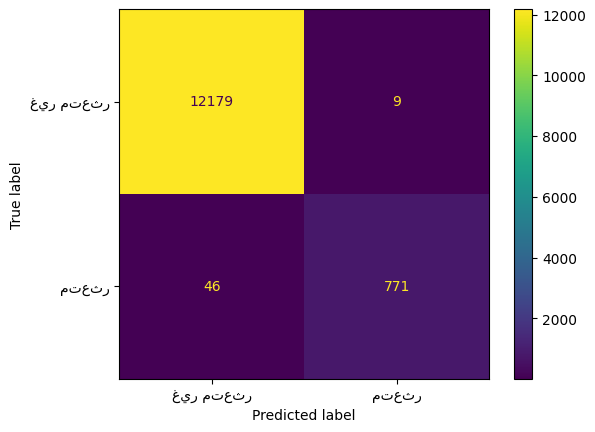

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# أسماء الفئات للعرض (على سبيل المثال، ["غير متعثر", "متعثر"])
target_names = ["غير متعثر", "متعثر"]

# حساب مصفوفة الارتباك
cm = confusion_matrix(y_test, y_pred)

# عرض مصفوفة الارتباك
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# قائمة بالأعمدة الفئوية التي تحتاج إلى تحويل
label_cols = ['الحالة الاجتماعية', 'الحالة الصحية',"المنطقة", 'المدينة', 'المسكن', 'ملكية المسكن', 'تصنيف', 'مسار الدعم السكني']

le = LabelEncoder()

# تحويل القيم الفئوية إلى أرقام
for col in label_cols:
    if col in new_data.columns:
        new_data[col] = le.fit_transform(new_data[col])


تحديد عدد الاسر المتوقع تعثرهم في الدفعات القادمة

In [ ]:
# تحديد الأعمدة التي استخدمت في تدريب النموذج
feature_columns = ['الحالة الاجتماعية', 'العمر', 'الحالة الصحية', 'المنطقة', 'المدينة',
                   'دخل رب الأسرة', 'مجموع الدخل', 'عدد الافراد', 'المسكن', 'ملكية المسكن',
                   'قيمة الايجار', 'تصنيف', 'مسار الدعم السكني']

# التأكد من أن البيانات الجديدة تحتوي فقط على الأعمدة المستخدمة في التدريب
new_data_prepared = new_data[feature_columns]

# إذا كنت قد استخدمت StandardScaler في تدريب النموذج، قم بتحجيم البيانات الجديدة
new_data_scaled = scaler.fit_transform(new_data_prepared)

# التنبؤ باستخدام النموذج المحسن
new_data_predictions = best_model.predict(new_data_scaled)

# حساب عدد الأسر المتوقع تعثرهم
num_expected_distressed = sum(new_data_predictions)

print(f'عدد الأسر المتوقع تعثرهم في الدفعات القادمة: {num_expected_distressed}')


عدد الأسر المتوقع تعثرهم في الدفعات القادمة: 4000


In [ ]:
# إنشاء قاموس لتحويل الأرقام من 0 إلى 12 إلى أسماء المناطق
region_mapping = {
    0: 'الباحة',
    1: 'الجوف',
    2: 'الحدود الشمالية',
    3: 'القصيم',
    4: 'المدينة المنورة',
    5: 'المنطقة الشرقية',
    6: 'تبوك',
    7: 'جازان',
    8: 'حائل',
    9: 'عسير',
    10: 'منطقة الرياض',
    11: 'منطقة مكة المكرمة',
    12: 'نجران'
}

# تحويل الأرقام في عمود "المنطقة" إلى أسماء المناطق باستخدام القاموس
new_data['المنطقة'] = new_data['المنطقة'].map(region_mapping)

# عرض النتيجة
print(new_data['المنطقة'])


0                     عسير
1                     تبوك
2             منطقة الرياض
3             منطقة الرياض
4             منطقة الرياض
               ...        
65017    منطقة مكة المكرمة
65018                 عسير
65019         منطقة الرياض
65020               القصيم
65021                 تبوك
Name: المنطقة, Length: 65022, dtype: object


المناطق الجغرافية التي تشهد اعلى تسب تعثر الفئات المدعومة

In [ ]:
# إضافة التوقعات إلى البيانات الجديدة
new_data['financial_distress_prediction'] = new_data_predictions

# حساب عدد الأسر المتوقعة تعثرها حسب المنطقة
distressed_by_region = new_data[new_data['financial_distress_prediction'] == 1].groupby('المنطقة').size()

print(distressed_by_region)


المنطقة
الباحة                 31
الجوف                  73
الحدود الشمالية        95
القصيم                239
المدينة المنورة       268
المنطقة الشرقية       500
تبوك                  221
جازان                 253
حائل                  124
عسير                  301
منطقة الرياض          652
منطقة مكة المكرمة    1185
نجران                  58
dtype: int64


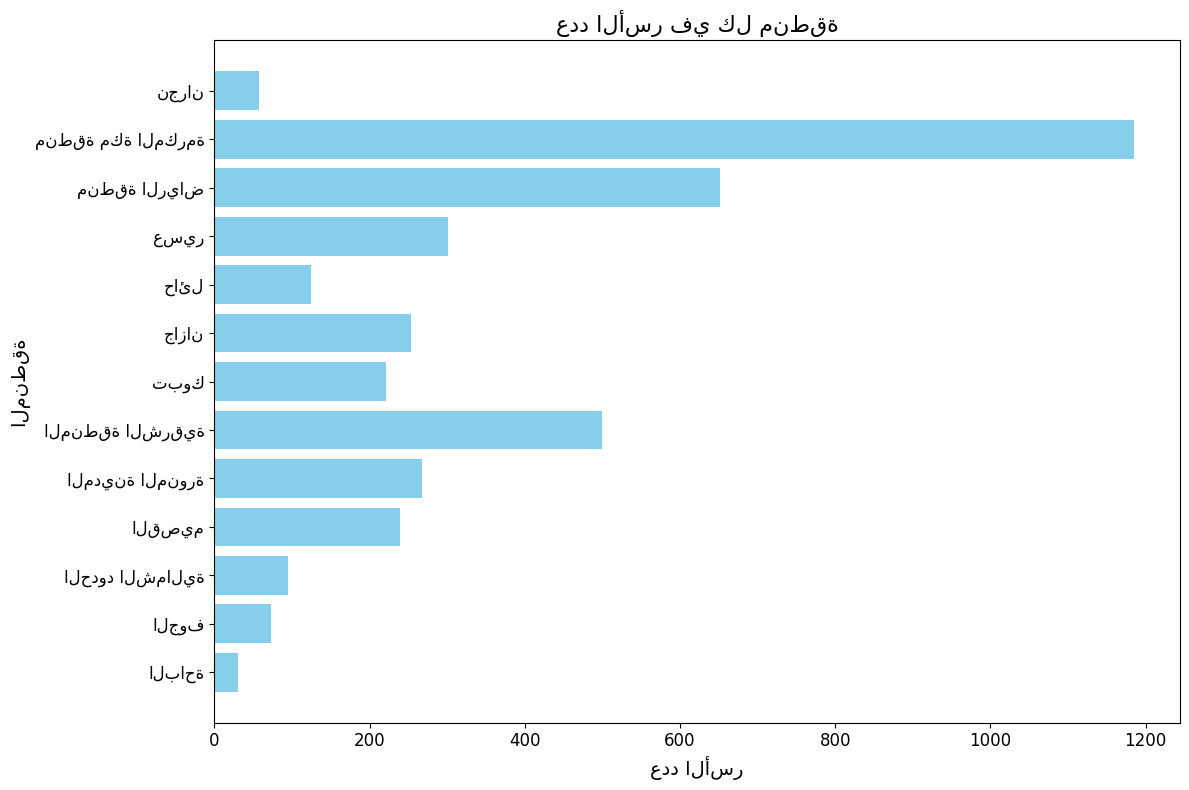

In [ ]:
import matplotlib.pyplot as plt

# البيانات
regions = [
    'الباحة', 'الجوف', 'الحدود الشمالية', 'القصيم', 'المدينة المنورة',
    'المنطقة الشرقية', 'تبوك', 'جازان', 'حائل', 'عسير',
    'منطقة الرياض', 'منطقة مكة المكرمة', 'نجران'
]
values = [31, 73, 95, 239, 268, 500, 221, 253, 124, 301, 652, 1185, 58]

# رسم الرسم البياني
plt.figure(figsize=(12, 8))  # ضبط حجم الشكل
plt.barh(regions, values, color='skyblue')  # رسم مخطط أفقي

# إضافة عنوان ومحاور
plt.title('عدد الأسر في كل منطقة', fontsize=16)
plt.xlabel('عدد الأسر', fontsize=14)
plt.ylabel('المنطقة', fontsize=14)

# ضبط شكل المحور العمودي ليكون النص العربي مقروءاً بشكل صحيح
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# عرض الرسم البياني
plt.tight_layout()
plt.show()


اسباب تاثر الفئات

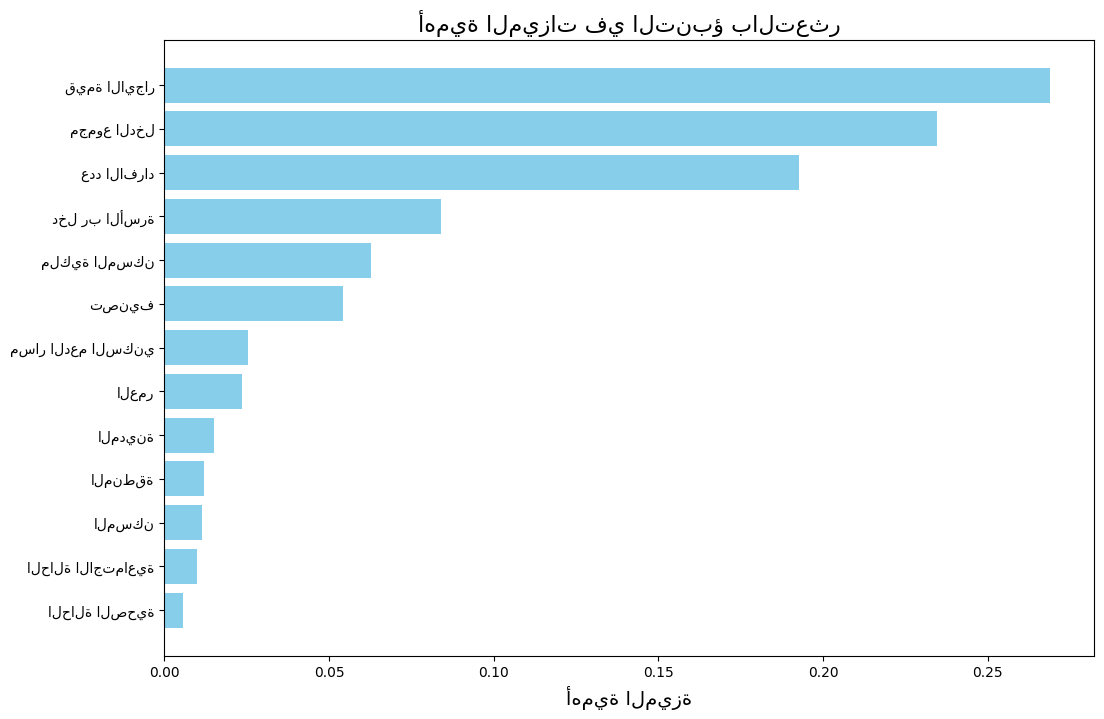

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# الحصول على الأهمية المميزة من النموذج المدرب
feature_importances = best_model.feature_importances_

# إنشاء DataFrame لعرض الأهمية المميزة لكل ميزة
features_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
})

# ترتيب الميزات حسب الأهمية
features_df = features_df.sort_values(by='Importance', ascending=False)

# رسم الأهمية المميزة
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('أهمية الميزة', fontsize=14)
plt.title('أهمية الميزات في التنبؤ بالتعثر', fontsize=16)
plt.gca().invert_yaxis()
plt.show()


In [ ]:
print(new_data.columns)

Index(['الحالة الاجتماعية', 'العمر', 'الحالة الصحية', 'المنطقة', 'المدينة',
       'دخل رب الأسرة', 'مجموع الدخل', 'عدد الافراد', 'المسكن', 'ملكية المسكن',
       'قيمة الايجار', 'تصنيف', 'مسار الدعم السكني', 'المنطقة_encoded',
       'financial_distress_prediction'],
      dtype='object')


المناطق التي لديها اعلى نسبة ايجار

In [ ]:
# حساب نسبة التعثر لكل منطقة باستخدام العمود 'financial_distress_prediction'
distress_by_region = new_data.groupby('المنطقة')['financial_distress_prediction'].mean()

# عرض النتيجة
print(distress_by_region)


المنطقة
الباحة               0.030068
الجوف                0.029591
الحدود الشمالية      0.045783
القصيم               0.047705
المدينة المنورة      0.066950
المنطقة الشرقية      0.062869
تبوك                 0.065057
جازان                0.049892
حائل                 0.064149
عسير                 0.063866
منطقة الرياض         0.062066
منطقة مكة المكرمة    0.076843
نجران                0.040194
Name: financial_distress_prediction, dtype: float64
